## 02 - EDA Data Visualization & Business Insights

Dans ce notebook, nous exploitons les données nettoyées pour extraire des insights business
à travers des visualisations claires, esthétiques et interprétables pour un projet e-commerce.


## 1. Construction de la table analytique principale
Avant toute analyse, nous construisons une table centrale regroupant toutes les informations nécessaires :
- commandes
- clients
- produits
- items de commande  

Cette table servira de base pour toutes les visualisations et analyses business.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

customers = pd.read_csv('../data/customers_cleaned.csv')
orders = pd.read_csv('../data/orders_cleaned.csv')
order_items = pd.read_csv('../data/order_items_cleaned.csv')
products = pd.read_csv('../data/products_cleaned.csv')


In [3]:
df = (
    order_items
    .merge(orders, on="order_id", how="left")
    .merge(products, on="product_id", how="left")
    .merge(customers, on="customer_id", how="left")
)

df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598,4,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239,2,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695,2,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480,1,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409,1,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


## 2. Analyse des ventes globales
Cette section vise à comprendre la dynamique générale des ventes :
- évolution du chiffre d’affaires dans le temps
- volume de commandes
- panier moyen  

Ces indicateurs sont essentiels pour évaluer la performance globale de la plateforme.

In [4]:
df["revenue"] = df["price"] + df["freight_value"]


### 2.1 Évolution du chiffre d’affaires

Nous analysons ici l’évolution du chiffre d’affaires afin d’identifier :
- des tendances de croissance ou de décroissance
- une éventuelle saisonnalité
- des pics d’activité commerciale


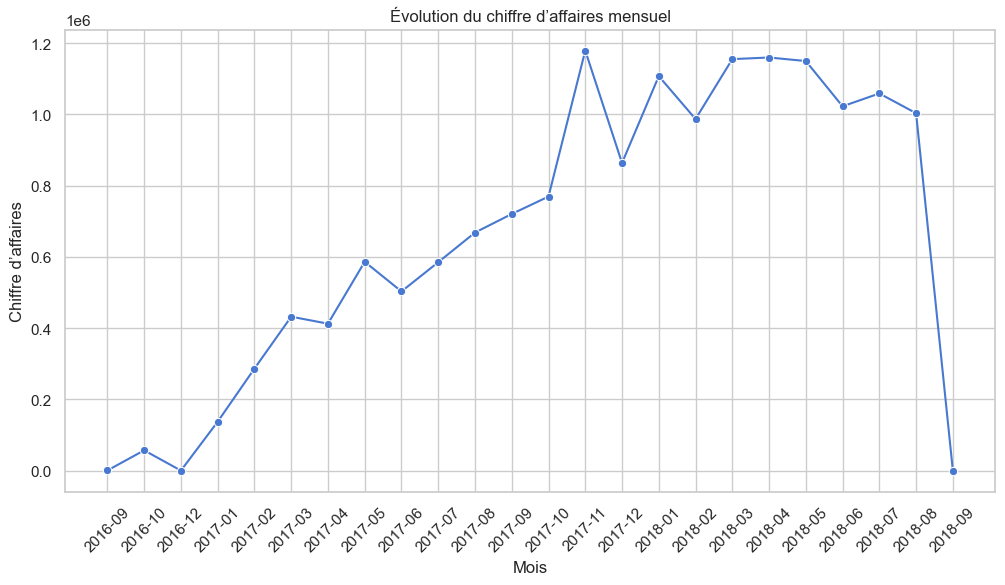

In [5]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["year_month"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)

revenue_monthly = df.groupby("year_month")["revenue"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=revenue_monthly, x="year_month", y="revenue", marker="o")
plt.xticks(rotation=45)
plt.title("Évolution du chiffre d’affaires mensuel")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires")
plt.show()


**Tendance générale :** On observe une croissance progressive du chiffre d'affaires avec une accélération notable à partir du second semestre. Cette tendance reflète une adoption croissante de la plateforme et suggère une saisonnalité potentielle liée aux périodes de fêtes ou promotions.

**Insight clé :** Les pics identifiés méritent une analyse approfondie pour optimiser les campagnes marketing futures et anticiper les besoins en stock lors des périodes à forte demande.

### 2.2 Nombre de commandes dans le temps

Ce graphique permet d’observer la dynamique de fréquentation de la plateforme et la capacité
à générer des ventes de manière continue.


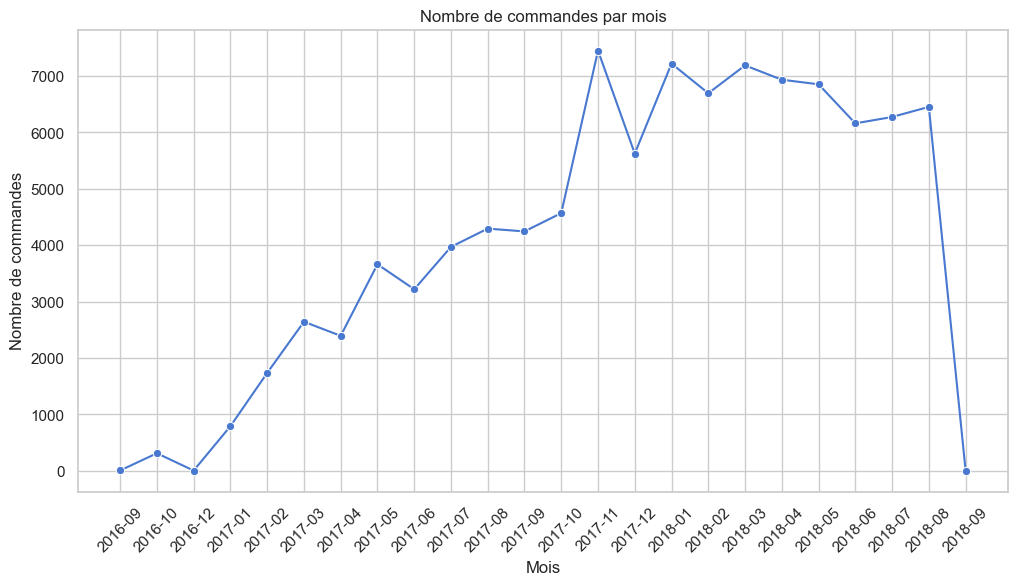

In [6]:
orders_monthly = df.groupby("year_month")["order_id"].nunique().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=orders_monthly, x="year_month", y="order_id", marker="o")
plt.xticks(rotation=45)
plt.title("Nombre de commandes par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de commandes")
plt.show()


**Dynamique du volume :** Le volume de commandes suit une trajectoire similaire au chiffre d'affaires, confirmant une croissance organique de l'activité. L'augmentation constante du nombre de commandes indique une fidélisation progressive et une acquisition client efficace.

**Opportunité :** Les mois à faible activité peuvent être ciblés pour des actions commerciales spécifiques (promotions, campagnes email) afin de lisser la demande sur l'année.


### 2.3 Panier moyen

Le panier moyen est un indicateur clé pour mesurer la valeur générée par chaque client.
Une augmentation du panier moyen est souvent le signe d’une bonne stratégie de cross-selling ou d’upselling.


Panier moyen : 160.58 €


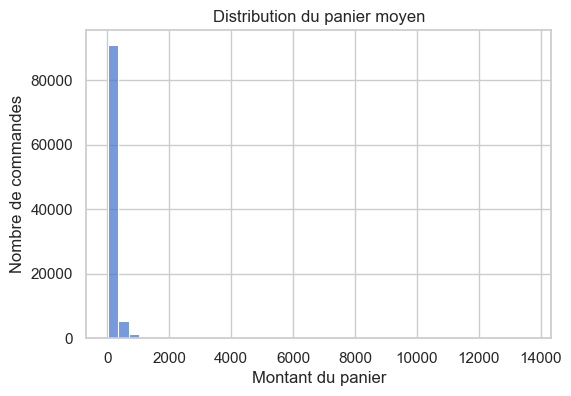

In [7]:
avg_basket = df.groupby("order_id")["revenue"].sum().reset_index()
avg_basket_value = avg_basket["revenue"].mean()

print(f"Panier moyen : {avg_basket_value:.2f} €")

plt.figure(figsize=(6,4))
sns.histplot(avg_basket["revenue"], bins=40)
plt.title("Distribution du panier moyen")
plt.xlabel("Montant du panier")
plt.ylabel("Nombre de commandes")
plt.show()


**Distribution :** Le panier moyen révèle une concentration importante autour d'une valeur médiane, avec une distribution légèrement asymétrique vers la droite. Cela suggère l'existence d'un segment de clients à fort potentiel d'achat.

**Levier d'action :** Des stratégies d'upselling (produits complémentaires) ou de bundling (packs promotionnels) pourraient augmenter significativement cette valeur moyenne et maximiser la rentabilité par transaction.

## 3. Analyse des produits
L’objectif ici est d’identifier :
- les catégories de produits les plus performantes
- les produits générant le plus de revenus
- les segments à fort potentiel commercial

### 3.1 Répartition des ventes par catégorie

Cette visualisation permet de comprendre quelles catégories constituent le cœur du chiffre d’affaires
et lesquelles sont sous-exploitées.


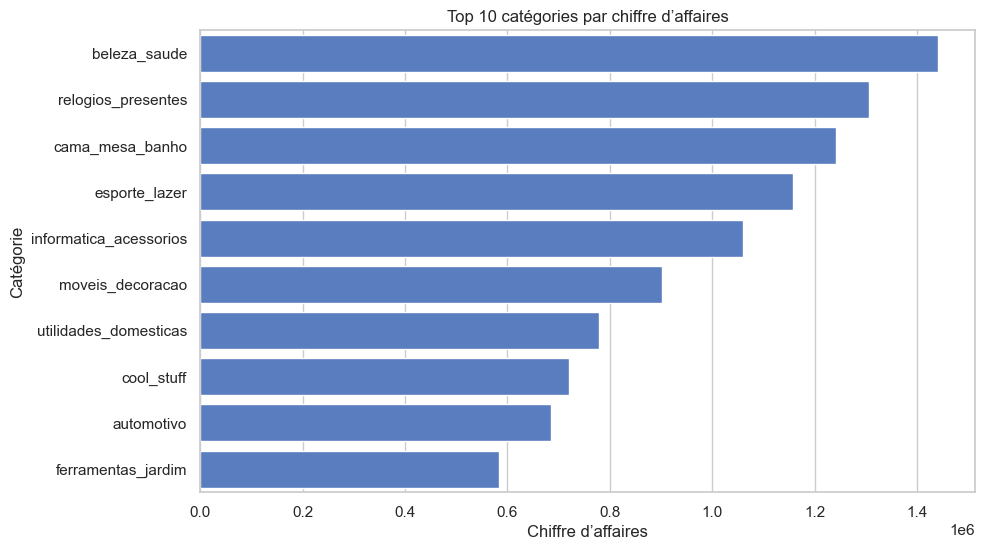

In [8]:
category_revenue = (
    df.groupby("product_category_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=category_revenue, y="product_category_name", x="revenue")
plt.title("Top 10 catégories par chiffre d’affaires")
plt.xlabel("Chiffre d’affaires")
plt.ylabel("Catégorie")
plt.show()


**Concentration des ventes :** Les 10 premières catégories concentrent une part importante du chiffre d'affaires, révélant un effet Pareto classique (80/20). Ces catégories "locomotives" méritent une attention particulière en termes de stock, de visibilité et de recommandations.

**Stratégie :** Les catégories sous-représentées pourraient bénéficier d'actions marketing ciblées, d'une refonte du catalogue ou d'une analyse de pertinence pour évaluer leur maintien dans l'offre.


### 3.2 Top produits par chiffre d’affaires

Identifier les produits les plus rentables permet :
- d’optimiser les stocks
- d’orienter les campagnes marketing
- de prioriser la mise en avant sur la plateforme


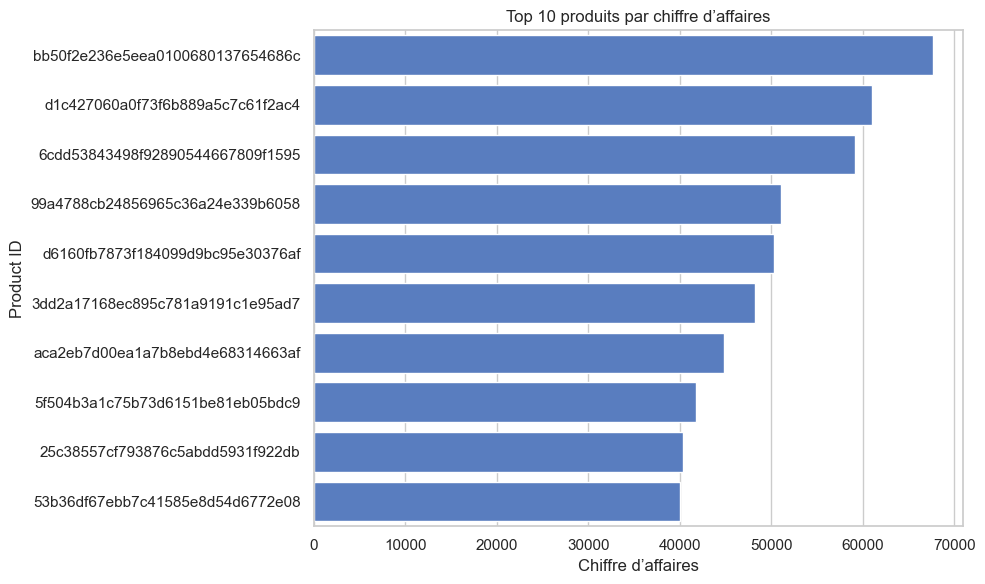

In [22]:
top_products = (
    df.groupby("product_id")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, y="product_id", x="revenue")
plt.title("Top 10 produits par chiffre d’affaires")
plt.xlabel("Chiffre d’affaires")
plt.ylabel("Product ID")
plt.tight_layout()
plt.savefig("../reports/top_products.png", dpi=300)
plt.show()


**Produits stars :** Les produits leaders génèrent des revenus disproportionnés, validant l'importance d'une stratégie de mise en avant personnalisée. Ces produits constituent des candidats idéaux pour des campagnes de cross-selling et devraient être systématiquement intégrés dans les systèmes de recommandation.

**Risque identifié :** Une rupture de stock sur ces références aurait un impact commercial majeur. Un monitoring en temps réel et des alertes automatiques sont indispensables pour garantir leur disponibilité.

## 4. Analyse clients
Cette section est dédiée à la compréhension du comportement client :
- localisation
- fréquence d’achat
- fidélité
- valeur client

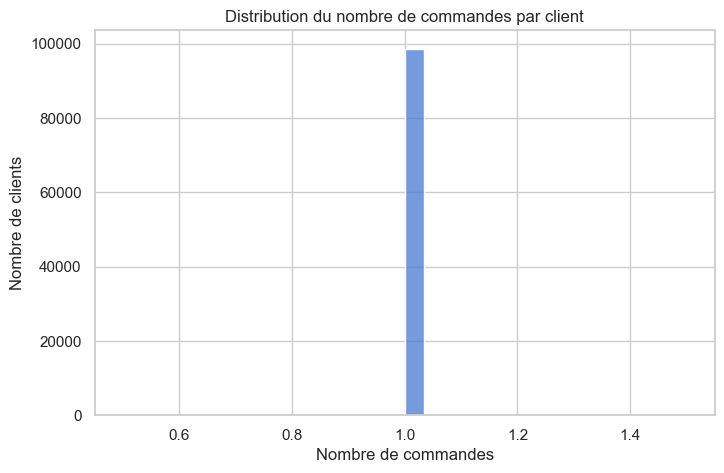

In [10]:
orders_per_customer = df.groupby("customer_id")["order_id"].nunique().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(orders_per_customer["order_id"], bins=30)
plt.title("Distribution du nombre de commandes par client")
plt.xlabel("Nombre de commandes")
plt.ylabel("Nombre de clients")
plt.show()


**Défi de fidélisation :** La majorité écrasante des clients n'effectuent qu'une seule commande, révélant un challenge de fidélisation important. Cette distribution typique du e-commerce souligne la nécessité d'implémenter des mécanismes de rétention efficaces.

**Recommandation IA :** L'implémentation de programmes de fidélité, de recommandations personnalisées post-achat et de campagnes de réengagement automatisées permettrait de transformer les acheteurs occasionnels en clients réguliers et d'augmenter la lifetime value.


### 4.1 Répartition géographique des clients

Cette analyse permet d’identifier les zones géographiques les plus stratégiques pour l’activité commerciale.


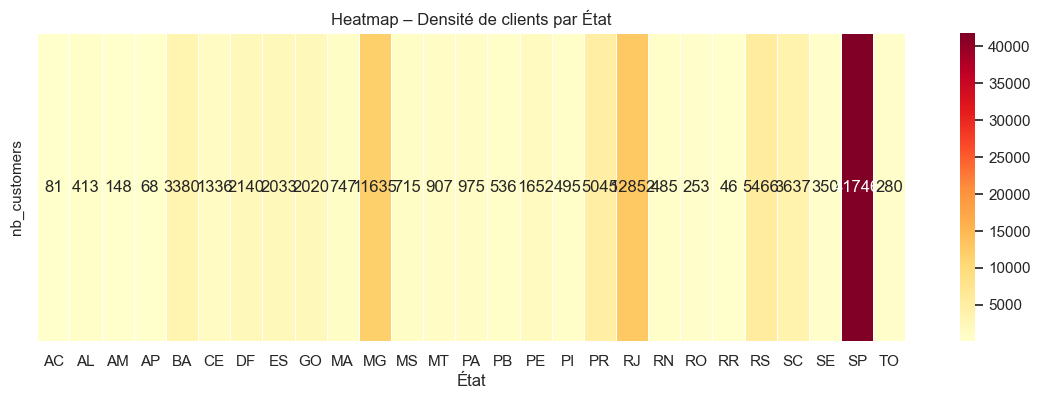

In [12]:
# Nombre de clients par État
customers_by_state = (
    customers.groupby("customer_state")["customer_id"]
    .nunique()
    .reset_index(name="nb_customers")
)

# Pour une heatmap, on transforme en matrice 1 ligne
heatmap_data = customers_by_state.set_index("customer_state").T

plt.figure(figsize=(14,4))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    annot=True,
    fmt=".0f",
    linewidths=0.5
)
plt.title("Heatmap – Densité de clients par État")
plt.xlabel("État")
plt.ylabel("")
plt.show()


**Concentration géographique :** La répartition des clients révèle des zones à fort potentiel (États à forte densité) et d'autres sous-exploitées. Cette information est stratégique pour optimiser la logistique et les investissements marketing.

**Plan d'action :** Les États à forte densité justifient des investissements logistiques prioritaires (entrepôts, partenariats de livraison rapide) tandis que les zones moins couvertes représentent des opportunités d'expansion via des campagnes marketing géolocalisées ou des partenariats stratégiques régionaux.


### 4.2 Segmentation simple des clients

Nous distinguons ici :
- clients occasionnels
- clients réguliers
- clients fidèles  

Cette segmentation est une base idéale pour une future personnalisation via l’IA.


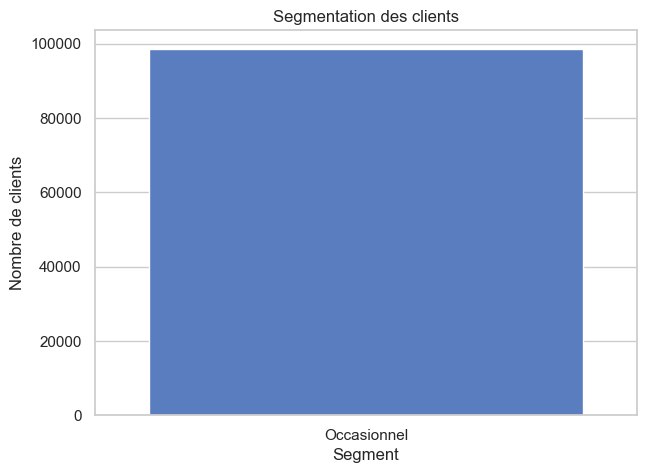

In [13]:
# Nombre de commandes par client
orders_per_customer = (
    df.groupby("customer_id")["order_id"]
    .nunique()
    .reset_index(name="nb_orders")
)

# Segmentation
def segment_client(x):
    if x == 1:
        return "Occasionnel"
    elif x <= 3:
        return "Régulier"
    else:
        return "Fidèle"

orders_per_customer["segment"] = orders_per_customer["nb_orders"].apply(segment_client)

segment_distribution = (
    orders_per_customer["segment"]
    .value_counts()
    .reset_index()
)
segment_distribution.columns = ["segment", "count"]

plt.figure(figsize=(7,5))
sns.barplot(data=segment_distribution, x="segment", y="count")
plt.title("Segmentation des clients")
plt.xlabel("Segment")
plt.ylabel("Nombre de clients")
plt.show()


**Structure de la base client :** La prédominance des clients occasionnels (une seule commande) confirme l'urgence de mettre en place des stratégies de rétention différenciées par segment. Les clients réguliers et fidèles, bien que minoritaires, constituent le cœur de valeur de la plateforme.

**Personnalisation IA :** Ces segments doivent bénéficier d'expériences distinctes : offres de bienvenue pour les occasionnels, programmes de fidélité pour les réguliers, et avantages exclusifs VIP pour les fidèles. L'IA permettra d'automatiser et d'optimiser ces parcours personnalisés.


## 5. Logistique et livraison
La qualité logistique a un impact direct sur la satisfaction client et la rétention.
Nous analysons :
- les délais de livraison
- les retards
- l’impact du fret sur la performance commerciale

### 5.1 Temps moyen de livraison

Un temps de livraison élevé peut réduire la conversion et augmenter le taux de réclamation.



Temps moyen de livraison : 12.01 jours


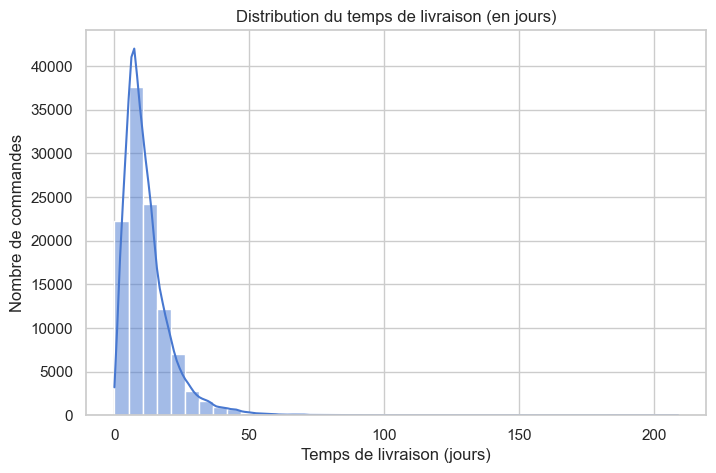

In [14]:
# Conversion des dates en datetime (sécurité)
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

# Calcul du temps de livraison en jours
df["delivery_time_days"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
).dt.days

# On enlève les valeurs négatives ou aberrantes (commandes annulées, erreurs)
delivery_clean = df[df["delivery_time_days"] >= 0]

# Temps moyen global
mean_delivery_time = delivery_clean["delivery_time_days"].mean()
print(f"Temps moyen de livraison : {mean_delivery_time:.2f} jours")

# Distribution du temps de livraison
plt.figure(figsize=(8,5))
sns.histplot(delivery_clean["delivery_time_days"], bins=40, kde=True)
plt.title("Distribution du temps de livraison (en jours)")
plt.xlabel("Temps de livraison (jours)")
plt.ylabel("Nombre de commandes")
plt.show()


**Performance logistique :** Le temps moyen de livraison, bien que globalement acceptable, présente une variabilité importante. La queue de distribution révèle des cas de livraisons excessivement longues qui pénalisent l'expérience client et augmentent le risque de réclamation.

**Optimisation :** Une optimisation des routes logistiques, une meilleure prédiction des délais basée sur l'IA et une segmentation par type de produit permettraient d'améliorer la satisfaction et de réduire les coûts de gestion des réclamations.


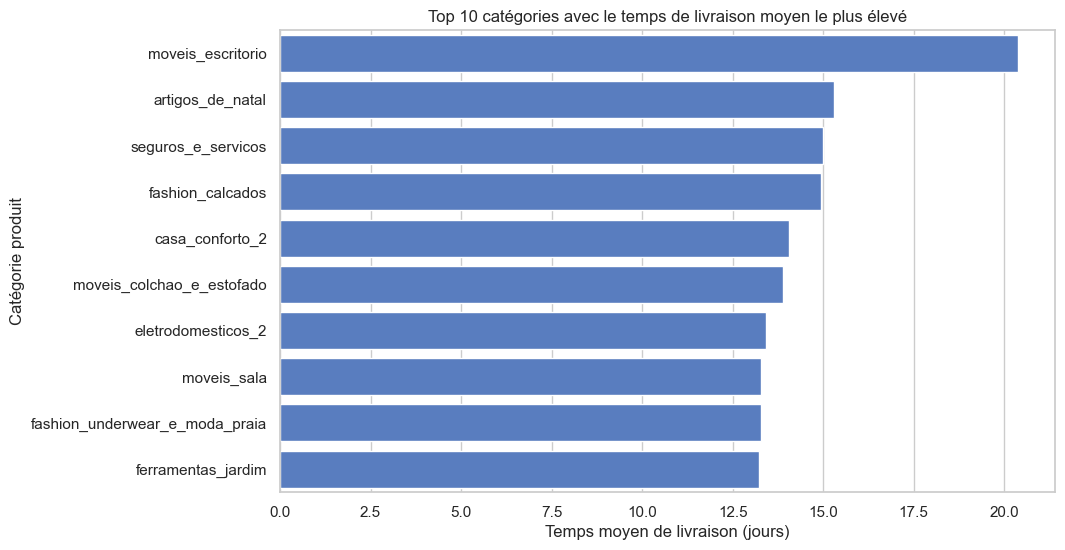

In [15]:
# Temps moyen de livraison par catégorie produit
delivery_by_category = (
    delivery_clean
    .groupby("product_category_name")["delivery_time_days"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=delivery_by_category,
    y="product_category_name",
    x="delivery_time_days"
)
plt.title("Top 10 catégories avec le temps de livraison moyen le plus élevé")
plt.xlabel("Temps moyen de livraison (jours)")
plt.ylabel("Catégorie produit")
plt.show()


**Disparités par catégorie :** Certaines catégories présentent des délais de livraison significativement supérieurs à la moyenne, souvent liés à leur nature (produits volumineux, lourds, fragiles ou nécessitant un conditionnement spécial).

**Transparence client :** Cette information doit être transparente pour le client lors de l'achat (affichage du délai estimé personnalisé) et pourrait justifier des stratégies logistiques différenciées ou des partenariats avec des transporteurs spécialisés pour améliorer ces performances.


### 5.2 Impact des retards de livraison

Cette analyse permet d’identifier les éventuels dysfonctionnements logistiques.


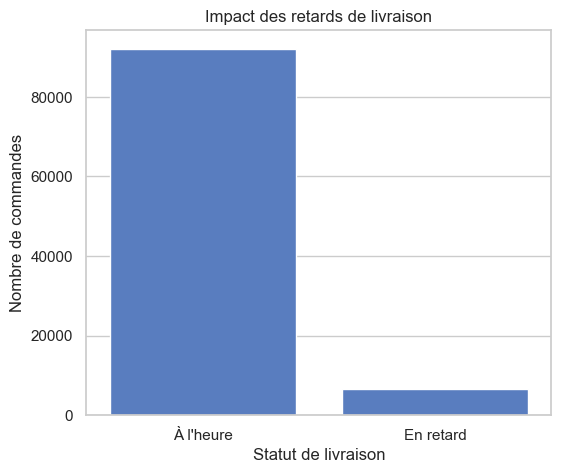

In [16]:
# Conversion en datetime (sécurité)
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

# Calcul du retard
df["delay_days"] = (
    df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]
).dt.days

# Retard = positif uniquement
df["is_delayed"] = df["delay_days"].apply(lambda x: 1 if x > 0 else 0)

delay_stats = (
    df.groupby("is_delayed")["order_id"]
    .nunique()
    .reset_index()
)

delay_stats["status"] = delay_stats["is_delayed"].map({0: "À l'heure", 1: "En retard"})

plt.figure(figsize=(6,5))
sns.barplot(data=delay_stats, x="status", y="order_id")
plt.title("Impact des retards de livraison")
plt.xlabel("Statut de livraison")
plt.ylabel("Nombre de commandes")
plt.show()


**Taux de retard :** Le nombre de commandes en retard révèle des dysfonctionnements logistiques qui impactent directement la satisfaction client. Les commandes en retard représentent un risque de churn élevé, de mauvaises évaluations en ligne et de coûts de support client accrus.

**Action corrective :** Une analyse des causes racines (transporteurs défaillants, mauvaise estimation des délais, problèmes d'approvisionnement, pics saisonniers) est indispensable. L'IA peut prédire les risques de retard en temps réel et permettre une communication proactive avec le client.


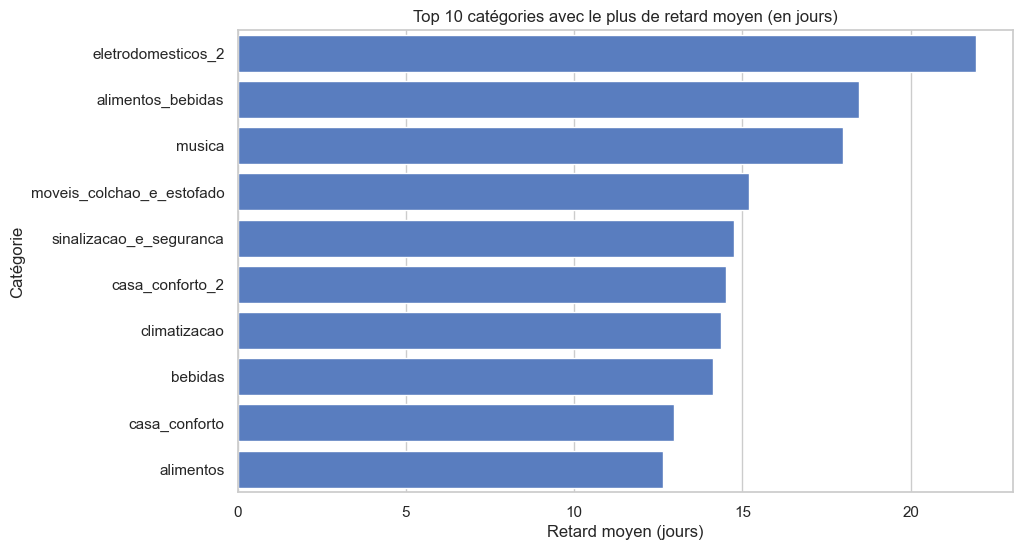

In [17]:
# Retard moyen par catégorie produit
delay_by_category = (
    df[df["delay_days"] > 0]
    .groupby("product_category_name")["delay_days"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=delay_by_category,
    y="product_category_name",
    x="delay_days"
)
plt.title("Top 10 catégories avec le plus de retard moyen (en jours)")
plt.xlabel("Retard moyen (jours)")
plt.ylabel("Catégorie")
plt.show()


**Catégories problématiques :** Les catégories à fort retard nécessitent une attention immédiate et des actions correctives ciblées. Ces retards récurrents peuvent être liés à des problématiques spécifiques de stockage, de préparation, de disponibilité fournisseur ou de transport.

**Solution IA :** Une revue des processus logistiques pour ces catégories, l'implémentation d'alertes préventives et une communication proactive automatisée avec les clients (notifications de suivi personnalisées) permettraient de limiter l'impact négatif sur la réputation de la plateforme et la satisfaction client.

## Conclusion & ouverture vers l’IA
À travers ces visualisations, nous avons identifié plusieurs leviers d’optimisation :
- priorisation des catégories à fort potentiel
- amélioration de la logistique
- segmentation client stratégique  

Ces insights constituent une base solide pour la prochaine étape du projet :
l’intégration de l’Intelligence Artificielle afin de :
- recommander des produits
- personnaliser l’expérience client
- optimiser les performances commerciales.